In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import os

In [ ]:
DF_train=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/Syllable_MFCC_train(1).csv')

Data was sparse due to the unequal lengths of the audio sounds. Training using such a data was not efficient. Hence data was cleaned and used for traning.

In [ ]:
DF_train

In [ ]:
X=DF_train.drop('39',axis=1)
Y=DF_train['39']

In [ ]:
X.head()

In [ ]:
Y

0          ba
1          ba
2          ba
3          ba
4          ba
         ... 
472475    muu
472476    muu
472477    muu
472478    muu
472479    muu
Name: 39, Length: 472480, dtype: object

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X

In [ ]:
#One hot encoding Y
encoder =  LabelEncoder()
Y1 = encoder.fit_transform(Y)
Y2 = pd.get_dummies(Y1).values
Y2

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
import keras
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=40, activation='relu'))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.2, input_shape=(2500,)))
model.add(Dense(2500,activation='relu'))
model.add(Dense(40, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8200      
                                                                 
 dense_1 (Dense)             (None, 2500)              502500    
                                                                 
 dropout (Dropout)           (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 2500)              6252500   
                                                                 
 dense_3 (Dense)             (None, 40)                100040    
                                                                 
Total params: 6,863,240
Trainable params: 6,863,240
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X, Y2, batch_size=100,validation_split=0.01, epochs=50)

Epoch 1/50
4678/4678 [==============================] - 20s 4ms/step - loss: 0.5902 - accuracy: 0.7611 - val_loss: 1.0965 - val_accuracy: 0.3456
Epoch 2/50
4678/4678 [==============================] - 21s 4ms/step - loss: 0.4022 - accuracy: 0.8357 - val_loss: 0.2210 - val_accuracy: 0.9332
Epoch 3/50
4678/4678 [==============================] - 21s 5ms/step - loss: 0.3324 - accuracy: 0.8652 - val_loss: 0.5811 - val_accuracy: 0.7730
Epoch 4/50
4678/4678 [==============================] - 21s 5ms/step - loss: 0.2851 - accuracy: 0.8853 - val_loss: 0.1252 - val_accuracy: 0.9694
Epoch 5/50
4678/4678 [==============================] - 20s 4ms/step - loss: 0.2546 - accuracy: 0.8989 - val_loss: 0.6524 - val_accuracy: 0.7576
Epoch 6/50
4678/4678 [==============================] - 20s 4ms/step - loss: 0.2312 - accuracy: 0.9074 - val_loss: 0.3089 - val_accuracy: 0.8957
Epoch 7/50
4678/4678 [==============================] - 21s 4ms/step - loss: 0.2199 - accuracy: 0.9130 - val_loss: 0.4269 - val_ac

In [ ]:
DF_test=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/Syllable_MFCC_test(1).csv')

In [ ]:
X_test=DF_test.drop('39',axis=1)
Y_test=DF_test['39']

In [ ]:
X_test

In [ ]:
Y_test

0          ba
1          ba
2          ba
3          ba
4          ba
         ... 
100219    muu
100220    muu
100221    muu
100222    muu
100223    muu
Name: 39, Length: 100224, dtype: object

In [ ]:
scaler=StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [ ]:
encoder=LabelEncoder()
Y_test1 = encoder.fit_transform(Y_test)
Y_test2 = pd.get_dummies(Y_test1).values
Y_test2

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test2, verbose=0,)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 63.1256217956543
Test accuracy: 0.16141842305660248


-------------------------------------------------
**TRAINING AND TESTING FOR EACH SYLLABLE SOUNDS**
-------------------------------------------------



MODEL:


In [ ]:
model = Sequential()
model.add(Dense(1500, input_dim=39, activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              60000     
                                                                 
 dense_1 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_2 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_3 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_4 (Dense)             (None, 10)                15010     
                                                                 
Total params: 6,829,510
Trainable params: 6,829,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True,verbose=1)


In [ ]:
import pickle
pickle.dump(model,open('/content/drive/MyDrive/Syllable_Annotated_Data/SyllableClassifier_10.pkl','wb'))

B SOUND

In [ ]:
btrain=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/b_train.csv')

In [ ]:
btrain

In [ ]:
btrain=btrain.drop('Unnamed: 0',axis=1)
btrain=btrain.drop('999',axis=1)
X=btrain.drop('39',axis=1)
Y=btrain['39']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

encoder =  LabelEncoder()
Y1 = encoder.fit_transform(Y)
Y2 = pd.get_dummies(Y1).values



In [ ]:
Y1r=encoder.inverse_transform(Y1)
Y1r

array(['ba', 'ba', 'ba', ..., 'buu', 'buu', 'buu'], dtype=object)

In [ ]:
model.fit(X, Y2, batch_size=900,validation_split=0.001, epochs=25,callbacks=[cp_callback])

Epoch 1/25
100/104 [===========================>..] - ETA: 0s - loss: 0.8789 - accuracy: 0.6832
Epoch 1: saving model to training_1/cp.ckpt
104/104 [==============================] - 4s 17ms/step - loss: 0.8705 - accuracy: 0.6860 - val_loss: 1.0775 - val_accuracy: 0.6064
Epoch 2/25
100/104 [===========================>..] - ETA: 0s - loss: 0.5054 - accuracy: 0.8126
Epoch 2: saving model to training_1/cp.ckpt
104/104 [==============================] - 2s 16ms/step - loss: 0.5015 - accuracy: 0.8140 - val_loss: 0.5580 - val_accuracy: 0.8404
Epoch 3/25
100/104 [===========================>..] - ETA: 0s - loss: 0.3537 - accuracy: 0.8684
Epoch 3: saving model to training_1/cp.ckpt
104/104 [==============================] - 2s 15ms/step - loss: 0.3522 - accuracy: 0.8691 - val_loss: 0.7880 - val_accuracy: 0.6064
Epoch 4/25
103/104 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.9074
Epoch 4: saving model to training_1/cp.ckpt
104/104 [==============================] - 2

In [ ]:
btest=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/b_test.csv')
#btest

In [ ]:
btest=btest.drop('Unnamed: 0',axis=1)
btest=btest.drop('999',axis=1)
X_test=btest.drop('39',axis=1)
Y_test=btest['39']


X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

Y_test1 = encoder.fit_transform(Y_test)
Y_test2 = pd.get_dummies(Y_test1).values

In [ ]:
model.load_weights(checkpoint_path)
loss, accuracy = model.evaluate(X_test, Y_test2, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 3.215196371078491
Test accuracy: 0.6347517967224121


In [ ]:
btest

In [ ]:
#this is for 100 batch size
pred=model.predict(X_test)
pred=np.argmax(pred, axis=1)
Y_test2=np.argmax(Y_test2, axis=1)
cm = confusion_matrix(Y_test2, pred)
print(cm)

705/705 [==============================] - 1s 2ms/step
[[2085  180   26   78    6    7   37   38   36   35]
 [ 206 1901   17   82    7   10   21   35   13   12]
 [  52   32 1157   35   44   90   10   12   12   28]
 [  52   41   43 2020   10   52   70  117   89   98]
 [  33   27  137   42  412 1776    8   28   43   22]
 [  12   18   76   26  109 2135   11   37   33   71]
 [  58   55   21   95   15   19 2000  205  134  118]
 [  13   26   10   92    3   18  900  812   91  179]
 [  20   12   33   54   15   40   54   42  718 1156]
 [  28   29    9   69    9   34   33  118  232 1039]]


In [ ]:
label=['ba','baa','bai','bau','bi','bii','bo','boo','bu','buu']

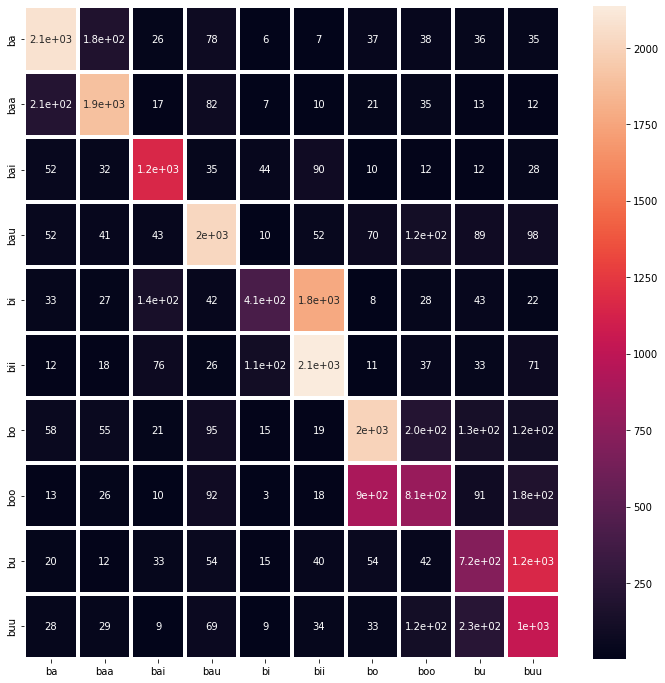

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(cm, annot=True, linewidths=3, ax=ax, xticklabels=label,yticklabels=label)


G SOUND

In [ ]:
gtrain=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/g_train.csv')
gtest=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/g_test.csv')

In [ ]:
gtrain=gtrain.drop('Unnamed: 0',axis=1)
gtrain=gtrain.drop('999',axis=1)
X_g=gtrain.drop('39',axis=1)
Y_g=gtrain['39']

scaler = StandardScaler()
X_g = scaler.fit_transform(X_g)
X_g = pd.DataFrame(X_g)

encoder =  LabelEncoder()
Y1_g = encoder.fit_transform(Y_g)
Y2_g = pd.get_dummies(Y1_g).values

In [ ]:
model.fit(X_g, Y2_g, batch_size=900,validation_split=0.001, epochs=25,callbacks=[cp_callback])

Epoch 1/25
105/107 [============================>.] - ETA: 0s - loss: 0.7971 - accuracy: 0.7284
Epoch 1: saving model to training_1/cp.ckpt
107/107 [==============================] - 2s 16ms/step - loss: 0.7942 - accuracy: 0.7293 - val_loss: 0.8153 - val_accuracy: 0.6771
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 0.4244 - accuracy: 0.8424
Epoch 2: saving model to training_1/cp.ckpt
107/107 [==============================] - 2s 16ms/step - loss: 0.4244 - accuracy: 0.8424 - val_loss: 1.1477 - val_accuracy: 0.7292
Epoch 3/25
106/107 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.9021
Epoch 3: saving model to training_1/cp.ckpt
107/107 [==============================] - 2s 15ms/step - loss: 0.2671 - accuracy: 0.9021 - val_loss: 1.1549 - val_accuracy: 0.7812
Epoch 4/25
106/107 [============================>.] - ETA: 0s - loss: 0.1828 - accuracy: 0.9350
Epoch 4: saving model to training_1/cp.ckpt
107/107 [==============================] - 2

In [ ]:
gtest=gtest.drop('Unnamed: 0',axis=1)
gtest=gtest.drop('999',axis=1)
X_test_g=gtest.drop('39',axis=1)
Y_test_g=gtest['39']


X_test_g = scaler.fit_transform(X_test_g)
X_test_g = pd.DataFrame(X_test_g)

Y_test1_g = encoder.fit_transform(Y_test_g)
Y_test2_g = pd.get_dummies(Y_test1_g).values

In [ ]:
model.load_weights(checkpoint_path)
loss, accuracy = model.evaluate(X_test_g, Y_test2_g, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.215620279312134
Test accuracy: 0.769379198551178


In [ ]:
#this is for 100 batch size
pred=model.predict(X_test_g)
pred=np.argmax(pred, axis=1)
Y_test2_g=np.argmax(Y_test2_g, axis=1)
cm_g = confusion_matrix(Y_test2_g, pred)
print(cm_g)

745/745 [==============================] - 1s 2ms/step
[[2173  192   32   85   20   41   64   45   44   56]
 [ 231 1650   13   59    5    9   16   39   25   33]
 [  80   85 2096   38   81   94   32   22   16   16]
 [  81  140   74 1890   16    9   78  133   53   54]
 [  13   27  103    4  951 1183   15   37   30   37]
 [   4   25   73    9  203 1797   11   41   51   90]
 [  40   68   23   69   36   46 2029  363   82   28]
 [  29   35   17   77    4   19  160 1370   65   80]
 [  28   51   21   52   32   34  102  119 1878  147]
 [  33   37   15   82   29   34   78  337  142 1325]]


In [ ]:
label_g=['ga','gaa','gai','gau','gi','gii','go','goo','gu','guu']

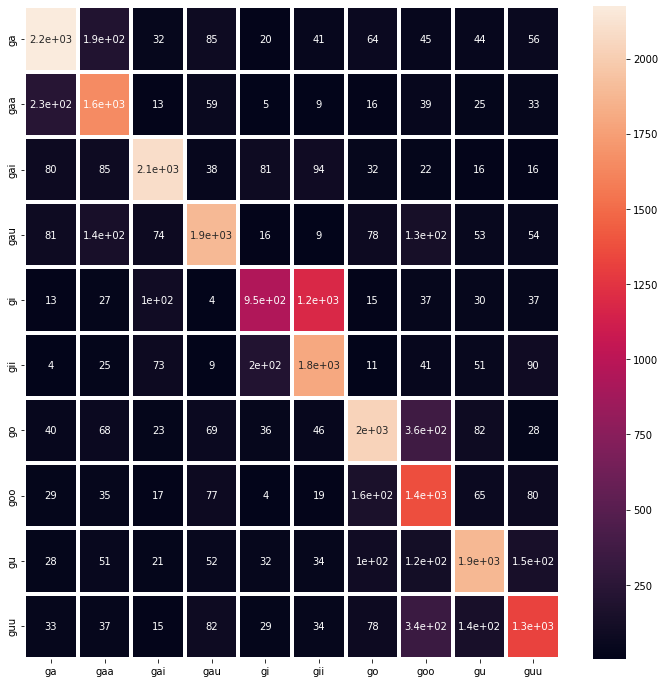

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(cm_g, annot=True, linewidths=3, ax=ax, xticklabels=label_g,yticklabels=label_g)

D SOUND

In [ ]:
dtrain=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/d_train.csv')
dtest=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/d_test.csv')

In [ ]:
dtrain=dtrain.drop('Unnamed: 0',axis=1)
dtrain=dtrain.drop('999',axis=1)
X_d=dtrain.drop('39',axis=1)
Y_d=dtrain['39']

X_d = scaler.fit_transform(X_d)
X_d = pd.DataFrame(X_d)

Y1_d = encoder.fit_transform(Y_d)
Y2_d = pd.get_dummies(Y1_d).values

In [ ]:
model.fit(X_d, Y2_d, batch_size=900,validation_split=0.001,callbacks=[cp_callback], epochs=25)

Epoch 1/25
113/115 [============================>.] - ETA: 0s - loss: 0.7039 - accuracy: 0.7533
Epoch 1: saving model to training_1/cp.ckpt
115/115 [==============================] - 3s 23ms/step - loss: 0.7016 - accuracy: 0.7540 - val_loss: 0.8783 - val_accuracy: 0.6214
Epoch 2/25
114/115 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8711
Epoch 2: saving model to training_1/cp.ckpt
115/115 [==============================] - 2s 17ms/step - loss: 0.3407 - accuracy: 0.8711 - val_loss: 0.4639 - val_accuracy: 0.8447
Epoch 3/25
111/115 [===========================>..] - ETA: 0s - loss: 0.1998 - accuracy: 0.9250
Epoch 3: saving model to training_1/cp.ckpt
115/115 [==============================] - 2s 15ms/step - loss: 0.1992 - accuracy: 0.9251 - val_loss: 0.4343 - val_accuracy: 0.8447
Epoch 4/25
114/115 [============================>.] - ETA: 0s - loss: 0.1284 - accuracy: 0.9513
Epoch 4: saving model to training_1/cp.ckpt
115/115 [==============================] - 2

In [ ]:
dtest=dtest.drop('Unnamed: 0',axis=1)
dtest=dtest.drop('999',axis=1)
X_test_d=dtest.drop('39',axis=1)
Y_test_d=dtest['39']


X_test_d = scaler.fit_transform(X_test_d)
X_test_d = pd.DataFrame(X_test_d)

Y_test1_d = encoder.fit_transform(Y_test_d)
Y_test2_d = pd.get_dummies(Y_test1_d).values

In [ ]:
loss, accuracy = model.evaluate(X_test_d, Y_test2_d, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.7863211631774902
Test accuracy: 0.688258945941925


In [ ]:
#this is for 100 batch size
pred=model.predict(X_test_d)
pred=np.argmax(pred, axis=1)
Y_test2_d=np.argmax(Y_test2_d, axis=1)
cm_d = confusion_matrix(Y_test2_d, pred)
print(cm_d)

700/700 [==============================] - 1s 2ms/step
[[2120  265   27  107   26   44   53   13   41   24]
 [ 241 1578   13   83   17    6   42  152   18   26]
 [  61   76 2017   57  139  107   48   50   36   33]
 [  93   96   11 1717   32   75  148   93   44   59]
 [  15   13  153   18 1880  179    8   47   39   48]
 [   0   10   38    2  207 1788    9   37   60   57]
 [  19   26    5   60   14    2  393 1003   30   48]
 [  16   18    6   34    3    5   73  877   12   44]
 [  20   15   37   70   22   61   52  129 1871  475]
 [  20   17    6   99   12   39   39  220  214 1798]]


In [ ]:
label_d=['da','daa','dai','dau','di','dii','do','doo','du','duu']

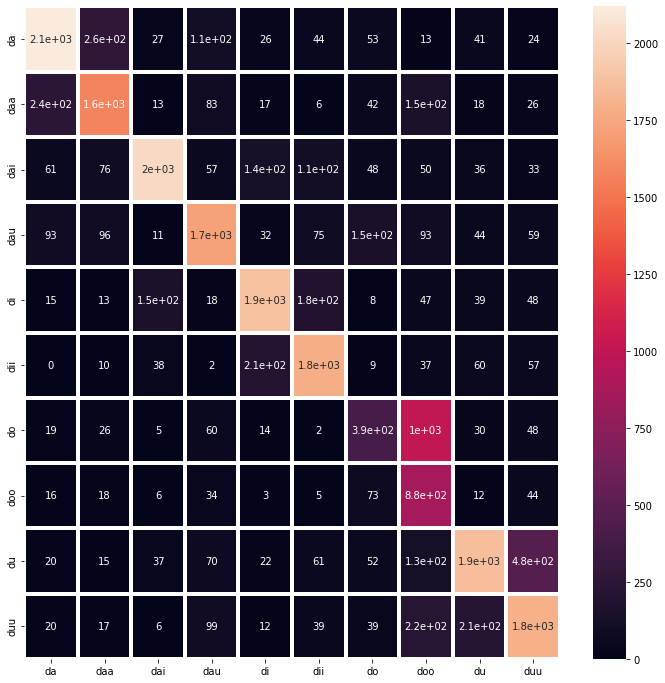

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(cm_d, annot=True, linewidths=3, ax=ax, xticklabels=label_d,yticklabels=label_d)

M SOUND

In [ ]:
mtrain=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/m_train.csv')
mtest=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/m_test.csv')

In [ ]:
mtrain.head()

,Unnamed: 0,999,0,1,2,3,4,5,6,7,...,30,31,32,33,34,35,36,37,38,39
0,380736,380736.0,-223.465851,91.336426,-21.775742,-16.337748,1.662772,-15.675766,-23.382353,-17.305824,...,1.987244,0.846728,1.606012,0.801673,0.386483,0.237636,-0.359469,1.66861,0.548557,ma
1,380737,380737.0,-222.409500,87.625443,-28.039227,-17.349684,-4.240952,-19.918421,-27.052086,-20.187632,...,1.987244,0.846728,1.606012,0.801673,0.386483,0.237636,-0.359469,1.66861,0.548557,ma
2,380738,380738.0,-236.166199,69.362930,-43.011345,-29.891453,-17.073776,-26.680088,-35.636261,-33.499691,...,1.987244,0.846728,1.606012,0.801673,0.386483,0.237636,-0.359469,1.66861,0.548557,ma
3,380739,380739.0,-218.202667,85.874603,-38.307243,-29.593624,-24.348682,-29.441338,-43.632999,-30.374653,...,1.987244,0.846728,1.606012,0.801673,0.386483,0.237636,-0.359469,1.66861,0.548557,ma
4,380740,380740.0,-194.339813,97.422035,-36.911041,-29.295948,-27.948967,-27.087509,-44.600609,-21.798573,...,1.987244,0.846728,1.606012,0.801673,0.386483,0.237636,-0.359469,1.66861,0.548557,ma


In [ ]:
mtrain=mtrain.drop('Unnamed: 0',axis=1)
mtrain=mtrain.drop('999',axis=1)
X_m=mtrain.drop('39',axis=1)
Y_m=mtrain['39']

scaler=StandardScaler()
X_m = scaler.fit_transform(X_m)
X_m = pd.DataFrame(X_m)

encoder=LabelEncoder()
Y1_m = encoder.fit_transform(Y_m)
Y2_m = pd.get_dummies(Y1_m).values

In [ ]:
model.fit(X_m, Y2_m, batch_size=900,validation_split=0.001, epochs=25,callbacks=[cp_callback])

Epoch 1/25
102/102 [==============================] - ETA: 0s - loss: 1.0594 - accuracy: 0.6423
Epoch 1: saving model to training_1/cp.ckpt
102/102 [==============================] - 2s 20ms/step - loss: 1.0594 - accuracy: 0.6423 - val_loss: 3.3393 - val_accuracy: 0.3152
Epoch 2/25
102/102 [==============================] - ETA: 0s - loss: 0.5186 - accuracy: 0.8047
Epoch 2: saving model to training_1/cp.ckpt
102/102 [==============================] - 2s 15ms/step - loss: 0.5186 - accuracy: 0.8047 - val_loss: 3.7556 - val_accuracy: 0.3478
Epoch 3/25
102/102 [==============================] - ETA: 0s - loss: 0.3134 - accuracy: 0.8861
Epoch 3: saving model to training_1/cp.ckpt
102/102 [==============================] - 2s 16ms/step - loss: 0.3134 - accuracy: 0.8861 - val_loss: 4.4484 - val_accuracy: 0.3804
Epoch 4/25
102/102 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9396
Epoch 4: saving model to training_1/cp.ckpt
102/102 [==============================] - 2

In [ ]:
mtest=mtest.drop('Unnamed: 0',axis=1)
mtest=mtest.drop('999',axis=1)
X_test_m=mtest.drop('39',axis=1)
Y_test_m=mtest['39']


X_test_m = scaler.fit_transform(X_test_m)
X_test_m = pd.DataFrame(X_test_m)

Y_test1_m = encoder.fit_transform(Y_test_m)
Y_test2_m = pd.get_dummies(Y_test1_m).values

In [ ]:
loss, accuracy = model.evaluate(X_test_m, Y_test2_m, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 3.391866445541382
Test accuracy: 0.683766782283783


In [ ]:
#this is for 100 batch size
pred=model.predict(X_test_m)
pred=np.argmax(pred, axis=1)
Y_test2_m=np.argmax(Y_test2_m, axis=1)
cm_m = confusion_matrix(Y_test2_m, pred)
print(cm_m)

745/745 [==============================] - 2s 2ms/step
[[1646  609   22   55   23   16   48   20   21   36]
 [ 229 1753   47   79   13   24   25   27   23   20]
 [  57   81 1980   33  203  135   13   23   26   41]
 [  63  119   21 1652   39   11  170   76   42  143]
 [  34   44   88   22 1846  252   51   50   71  102]
 [  14   48   39   26  198 1759   12  108   43  153]
 [  45   88   16  116   31   17 1719  167  118  147]
 [  50  123   28  127   24   20  850  620   74  132]
 [  32   45   35   72   22   39  122  138 1504  487]
 [  13   49   14   72   37   40   99  243  114 1527]]


In [ ]:
label_m=['ma','maa','mai','mau','mi','mii','mo','moo','mu','muu']

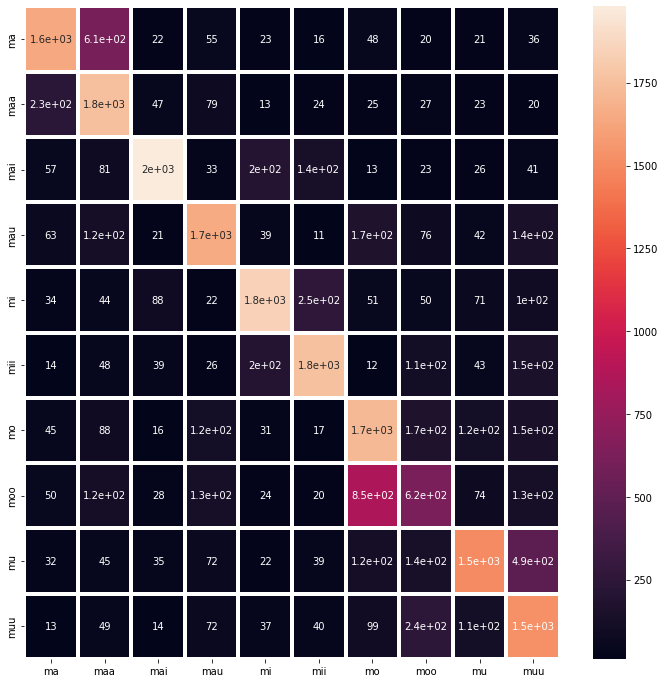

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(cm_m, annot=True, linewidths=3, ax=ax, xticklabels=label_m,yticklabels=label_m)

**Testing for each speaker for all 40 syllables**

In [ ]:
model_40 = Sequential()
model_40.add(Dense(200, input_dim=39, activation='relu'))
model_40.add(Dense(2500,activation='relu'))
model_40.add(Dense(2500,activation='relu'))
#model_40.add(Dense(1500,activation='relu'))
model_40.add(Dense(40, activation='softmax'))
model_40.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
print(model_40.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1500)              60000     
                                                                 
 dense_16 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_17 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_18 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_19 (Dense)            (None, 40)                60040     
                                                                 
Total params: 6,874,540
Trainable params: 6,874,540
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/Syllable_MFCC_train(1).csv')
test=pd.read_csv('/content/drive/MyDrive/Syllable_Annotated_Data/Syllable_MFCC_test(1).csv')


In [ ]:
train=train.drop('Unnamed: 0',axis=1)
X_40=train.drop('39',axis=1)
Y_40=train['39']

scaler=StandardScaler()
X_40 = scaler.fit_transform(X_40)
X_40 = pd.DataFrame(X_40)

encoder=LabelEncoder()
Y1_40 = encoder.fit_transform(Y_40)
Y2_40 = pd.get_dummies(Y1_40).values

In [ ]:
len(Y2_40)

472480

In [ ]:
model_40.fit(X_40,Y2_40,batch_size=100,validation_split=0.001, epochs=50)

Epoch 1/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.4214 - accuracy: 0.6164 - val_loss: 1.7940 - val_accuracy: 0.5909
Epoch 2/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.2584 - accuracy: 0.6638 - val_loss: 1.6206 - val_accuracy: 0.6874
Epoch 3/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.1679 - accuracy: 0.6898 - val_loss: 1.5367 - val_accuracy: 0.7439
Epoch 4/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.1153 - accuracy: 0.7053 - val_loss: 1.5829 - val_accuracy: 0.7575
Epoch 5/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.0817 - accuracy: 0.7154 - val_loss: 1.7340 - val_accuracy: 0.7479
Epoch 6/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.0588 - accuracy: 0.7226 - val_loss: 1.7691 - val_accuracy: 0.7727
Epoch 7/50
4721/4721 [==============================] - 21s 4ms/step - loss: 1.0424 - accuracy: 0.7279 - val_loss: 2.1001 - val_ac

In [ ]:
test=test.drop('Unnamed: 0',axis=1)
#test=mtest.drop('999',axis=1)
X_test_40=test.drop('39',axis=1)
Y_test_40=test['39']


X_test_40 = scaler.fit_transform(X_test_40)
X_test_40 = pd.DataFrame(X_test_40)

Y_test1_40 = encoder.fit_transform(Y_test_40)
Y_test2_40 = pd.get_dummies(Y_test1_40).values

In [ ]:
loss,accuracy=model_40.evaluate(X_test_40,Y_test2_40,verbose=0)
print("Test loss:",loss)
print("Test accuracy:",accuracy)

Test loss: 7.2287445068359375
Test accuracy: 0.22373881936073303
